In [5]:
import polars as pl

ModuleNotFoundError: No module named 'polars'

In [1]:
import pandas as pd


/tmp/ipykernel_32508/2035458946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import seaborn as sns


In [3]:
import matplotlib.pyplot as plt


In [4]:
import numpy as np

In [10]:
dlp = pl.read_csv("../data/prepared/dlp_to_plot.csv")
dlp.head(2)

eventName-token,eventSource-token,eventType-token,userAgent-token
i64,i64,i64,i64
344,48,1,5050
277,86,1,2580


In [11]:
dlp.describe()

describe,eventName-token,eventSource-token,eventType-token,userAgent-token
str,f64,f64,f64,f64
"""count""",100000.0,100000.0,100000.0,100000.0
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",658.30469,67.90649,1.00058,3327.76646
"""std""",279.868683,40.141871,0.024076,1935.690067
"""min""",1.0,4.0,1.0,2.0
"""25%""",405.0,23.0,1.0,1760.0
"""50%""",708.0,86.0,1.0,2990.0
"""75%""",882.0,98.0,1.0,4859.0
"""max""",1223.0,163.0,2.0,7365.0


In [5]:
dlp.unique().shape, dlp.shape

((8740, 4), (100000, 4))

In [8]:
# Number of unique logs => that are the unique types of logs present in the dataset.
dlp_unique = dlp.unique()
x_train = dlp_unique.to_numpy()

array([[1017,   86,    1, 2580],
       [ 344,   48,    1, 1580],
       [ 850,   85,    1, 6970],
       ...,
       [ 874,   98,    1, 1074],
       [ 470,    5,    1,  330],
       [ 470,    5,    1, 4215]])

In [ ]:
sns.relplot(data=dlp.to_pandas(), x="eventName-token", y="tip")

In [24]:
diff = np.zeros(dlp.shape[0])
for i in range(dlp.shape[0]):
    diff[i] = np.dot(dlp[0].to_numpy()[0], dlp[i].to_numpy()[0])

In [27]:
diff.min(), diff.argmin()

(130741.0, 58808)

In [28]:
dlp[0], dlp[58808]

(shape: (1, 4)
 ┌─────────────────┬───────────────────┬─────────────────┬─────────────────┐
 │ eventName-token ┆ eventSource-token ┆ eventType-token ┆ userAgent-token │
 │ ---             ┆ ---               ┆ ---             ┆ ---             │
 │ i64             ┆ i64               ┆ i64             ┆ i64             │
 ╞═════════════════╪═══════════════════╪═════════════════╪═════════════════╡
 │ 344             ┆ 48                ┆ 1               ┆ 5050            │
 └─────────────────┴───────────────────┴─────────────────┴─────────────────┘,
 shape: (1, 4)
 ┌─────────────────┬───────────────────┬─────────────────┬─────────────────┐
 │ eventName-token ┆ eventSource-token ┆ eventType-token ┆ userAgent-token │
 │ ---             ┆ ---               ┆ ---             ┆ ---             │
 │ i64             ┆ i64               ┆ i64             ┆ i64             │
 ╞═════════════════╪═══════════════════╪═════════════════╪═════════════════╡
 │ 344             ┆ 48                ┆ 1   

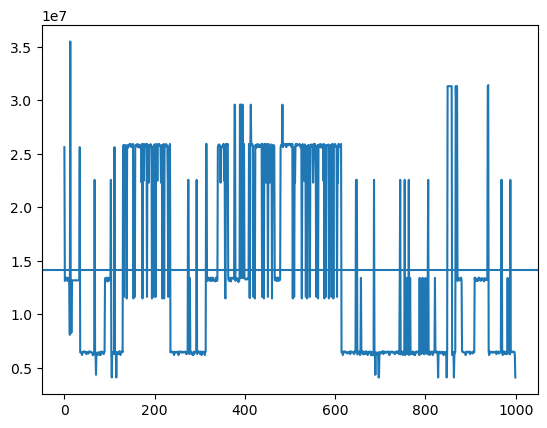

In [35]:
plt.plot(diff[:1000])
plt.axhline(y=np.mean(diff[:1000]))
plt.show()

In [38]:
d_flaws1 = pl.read_csv("../data/prepared/dlp_to_plot_flaws02.csv")

In [39]:
np.dot(dlp[0].to_numpy()[0], d_flaws1[0].to_numpy()[0])

25623141

In [40]:
# find nearest value from dlp and d_flaws1
value = np.dot(dlp[0].to_numpy()[0], d_flaws1[0].to_numpy()[0])
(np.abs(diff - value)).argmin()

0

In [52]:
#  Test if the results are compatible
d_flaws1[0], dlp[0]

(shape: (1, 4)
 ┌─────────────────┬───────────────────┬─────────────────┬─────────────────┐
 │ eventName-token ┆ eventSource-token ┆ eventType-token ┆ userAgent-token │
 │ ---             ┆ ---               ┆ ---             ┆ ---             │
 │ i64             ┆ i64               ┆ i64             ┆ i64             │
 ╞═════════════════╪═══════════════════╪═════════════════╪═════════════════╡
 │ 344             ┆ 48                ┆ 1               ┆ 5050            │
 └─────────────────┴───────────────────┴─────────────────┴─────────────────┘,
 shape: (1, 4)
 ┌─────────────────┬───────────────────┬─────────────────┬─────────────────┐
 │ eventName-token ┆ eventSource-token ┆ eventType-token ┆ userAgent-token │
 │ ---             ┆ ---               ┆ ---             ┆ ---             │
 │ i64             ┆ i64               ┆ i64             ┆ i64             │
 ╞═════════════════╪═══════════════════╪═════════════════╪═════════════════╡
 │ 344             ┆ 48                ┆ 1   

# Make the Seed an array of ones

In [45]:
diff_zeros = np.zeros(dlp.shape[0])
seed = np.ones(dlp.shape[1])
for i in range(dlp.shape[0]):
    diff_zeros[i] = np.dot(seed, dlp[i].to_numpy()[0])

In [46]:
diff_zeros

array([5443., 2944., 3106., ..., 5364., 2900., 3397.])

In [50]:
value = np.dot(seed, d_flaws1[3].to_numpy()[0])
(np.abs(diff_zeros - value)).argmin()

3

In [51]:
d_flaws1[3], dlp[3]

(shape: (1, 4)
 ┌─────────────────┬───────────────────┬─────────────────┬─────────────────┐
 │ eventName-token ┆ eventSource-token ┆ eventType-token ┆ userAgent-token │
 │ ---             ┆ ---               ┆ ---             ┆ ---             │
 │ i64             ┆ i64               ┆ i64             ┆ i64             │
 ╞═════════════════╪═══════════════════╪═════════════════╪═════════════════╡
 │ 1017            ┆ 86                ┆ 1               ┆ 2580            │
 └─────────────────┴───────────────────┴─────────────────┴─────────────────┘,
 shape: (1, 4)
 ┌─────────────────┬───────────────────┬─────────────────┬─────────────────┐
 │ eventName-token ┆ eventSource-token ┆ eventType-token ┆ userAgent-token │
 │ ---             ┆ ---               ┆ ---             ┆ ---             │
 │ i64             ┆ i64               ┆ i64             ┆ i64             │
 ╞═════════════════╪═══════════════════╪═════════════════╪═════════════════╡
 │ 1017            ┆ 86                ┆ 1   

In [53]:
dlp_new_seed = pl.DataFrame(diff_zeros).unique()

In [54]:
dlp_new_seed

column_0
f64
5999.0
7201.0
6815.0
1164.0
745.0
1753.0
5212.0
6024.0
2931.0
